# Challenge -  KNN Model for People Donated Blood #

## By Lorenz Madarang ##

## Data: https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data ##

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

In [12]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data'

In [13]:
df = pd.read_csv(url, sep=',')

In [14]:
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [15]:
df.columns

Index(['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',
       'Time (months)', 'whether he/she donated blood in March 2007'],
      dtype='object')

In [16]:
df = df.rename(index=str, columns = {'Recency (months)': 'recent_month',
                                'Frequency (times)' : 'frequency',
                                'Monetary (c.c. blood)' : 'blood_amount',
                                 'Time (months)' : 'time',
                                 'whether he/she donated blood in March 2007' : 'donated_march2007'})

In [17]:
df.head()

,recent_month,frequency,blood_amount,time,donated_march2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


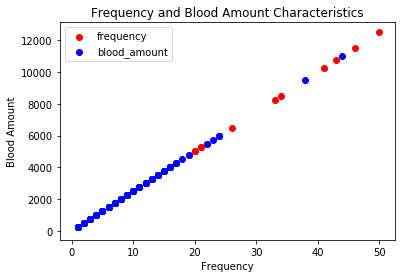

In [19]:
plt.scatter(
    df[df['donated_march2007'] == 1].frequency,
    df[df['donated_march2007'] == 1].blood_amount,
    color='red'
)
plt.scatter(
    df[df['donated_march2007'] == 0].frequency,
    df[df['donated_march2007'] == 0].blood_amount,
    color='blue'
)
plt.legend(['frequency', 'blood_amount'])
plt.title('Frequency and Blood Amount Characteristics')
plt.xlabel('Frequency')
plt.ylabel('Blood Amount')
plt.show()

In [18]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=1)
X = df[['frequency', 'blood_amount']]
Y = df.donated_march2007
neighbors.fit(X,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

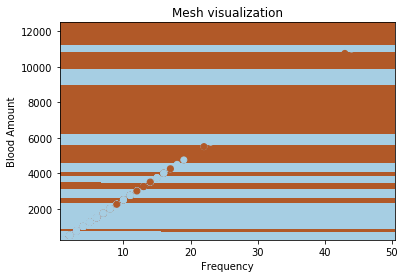

In [21]:
# Our data. Converting from data frames to arrays for the mesh.
X = np.array(X)
Y = np.array(Y)

# Mesh size.
h = .1

# Plot the decision boundary. We assign a color to each point in the mesh.
x_min = X[:, 0].min() - .5
x_max = X[:, 0].max() + .5
y_min = X[:, 1].min() - .5
y_max = X[:, 1].max() + .5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot.
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot.
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('Frequency')
plt.ylabel('Blood Amount')
plt.title('Mesh visualization')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()


In [23]:
neighbors = KNeighborsClassifier(n_neighbors=2)
X = df[['frequency', 'blood_amount']]
Y = df.donated_march2007
neighbors.fit(X,Y)

print(neighbors.predict([[30, 8000]]))
print(neighbors.predict_proba([[30, 8000]]))

[1]
[[ 0.  1.]]
